In [ ]:
# solving the black jack game described in example 5.1
using Random, StatsBase

# the face values for a suit
# ace through nine, ten, jack, queen, king
# note that 1=ace
suit = vcat(1, collect(2:9), 10, 10, 10, 10)

# a deck of cards consists of four suits: diamonds, clubs, hearts, spades
deck = repeat(suit, 4)
shuffle!(deck)     # a random permutation

# to simulate an infinite deck, we can sample with replacement
deal_cards(n) = sample(deck, n, replace=true)

# note that it's quite possible (in fact it's common) to have more than
# one ace in a hand, but it's not possible to have two "usable" aces.
# 1/2 = no/yes
usable_ace(hand) = (any(hand .== 1) && sum(hand) <= 11) ? 2 : 1

score(hand) = sum(hand) + (usable_ace(hand)==2 ? 10 : 0)

# simulate an episode of blackjack according to policy π
function blackjack(π, ϵ = 0.05)

    # THIS FUNCTION IS INCOMPLETE.
    player = deal_cards(2)
    dealer = deal_cards(2)
    while score(player) < 12
        append!(player, deal_cards(1))
    end

    states = fill(score(player), 1)
    actions = Int64[]
    usable = usable_ace(player)
    # 1 = hit, 2 = stick

    if score(player) == 21
        actions = 2
        if score(dealer) == 21
            return states, actions, 0, dealer[1], usable
        else
            return states, actions, 1, dealer[1], usable
        end
    end

    while true
        a = π[score(player) - 11,dealer[1],usable] 
        if rand() < ϵ
            if a == 1
                a = 2
            else
                a = 1
            end
        end
        if a == 2
            append!(actions, a)
            break
        else
            append!(actions, a)
            append!(player, deal_cards(1))
            if score(player) > 21
                return states, actions, -1, dealer[1], usable
            else
                append!(states, score(player))
            end
        end
    end

    while score(dealer) < 17
        append!(dealer, deal_cards(1))
    end
    if score(dealer) > 21 || score(player) > score(dealer)
        r = 1
    elseif score(player) < score(dealer)
        r = -1
    else
        r = 0
    end
    return states, actions, r, dealer[1], usable
end

# this is on-policy every-visit MC control because we do not check for
# 1st visits to states; however, for the game of blackjack, it's not
# possible to visit the same state twice in an episode. you could have
# an ace being counted as 11, and then later being counted as 1, but
# the indicator for a usable ace is part of the state.  also, note
# that we maintain exploration of nonoptimal actions in the function
# blackjack().
function MC!(q, qn, π)
    for i = 1:10e6
        i % 100000 == 0 && println("episode ", i)
        states, actions, r, dealer_1, usable = blackjack(π)
        @assert(length(states) == length(actions))
        @assert( r in [-1, 0, 1])
        T = length(states)
        for t = 1:T
            # since this is every-visit MC, the reward at the end
            # of the episode is the return for each state visited, and
            # there is no discounting, the direction of iteration over
            # the episode should not matter.
            
            # THIS FUNCTION IS INCOMPLETE.
            # the steps below need to be completed.
            
            # obtain the state s and action  a for play t
            s = states[t]
            a = actions[t]
            # update qn
            qn[s-11, dealer_1, usable, a] += 1

            # update q (this is an incremental update)
            q[s-11, dealer_1, usable, a] += (r - q[s-11, dealer_1, usable, a])/(qn[s-11, dealer_1, usable, a])
            # find the action that maxmizes q for state s
            a_star = findmax(q[s-11, dealer_1, usable, :])
            # update the policy
            π[s-11, dealer_1, usable] = a_star[2]
        end
    end
end

# the state space consists of
# the player's sum 12:21,
# the dealer's showing card 1:10,
# and indicator for usable ace no/yes=1/2
# for a total of 200 possible states.
# the action is hit/stick=1/2

# the initial policy is to stick when the player's sum is 20 or 21, otherwise hit
π = fill(1, (10, 10, 2))
π[9:10,:,:] .= 2           # stick when sum is 20 or 21
q = zeros(10, 10, 2, 2)    # q(state=(player,dealer,usable), action)
qn = zeros(10, 10, 2, 2)   # to hold the number of observations

MC!(q, qn, π)
π

episode 100000.0
episode 200000.0
episode 300000.0
episode 400000.0
episode 500000.0
episode 600000.0
episode 700000.0
episode 800000.0
episode 900000.0
episode 1.0e6
episode 1.1e6
episode 1.2e6
episode 1.3e6
episode 1.4e6
episode 1.5e6
episode 1.6e6
episode 1.7e6
episode 1.8e6
episode 1.9e6
episode 2.0e6
episode 2.1e6
episode 2.2e6
episode 2.3e6
episode 2.4e6
episode 2.5e6
episode 2.6e6
episode 2.7e6
episode 2.8e6
episode 2.9e6
episode 3.0e6
episode 3.1e6
episode 3.2e6
episode 3.3e6
episode 3.4e6
episode 3.5e6
episode 3.6e6
episode 3.7e6
episode 3.8e6
episode 3.9e6
episode 4.0e6
episode 4.1e6
episode 4.2e6
episode 4.3e6
episode 4.4e6
episode 4.5e6
episode 4.6e6
episode 4.7e6
episode 4.8e6
episode 4.9e6
episode 5.0e6
episode 5.1e6
episode 5.2e6
episode 5.3e6
episode 5.4e6
episode 5.5e6
episode 5.6e6
episode 5.7e6
episode 5.8e6
episode 5.9e6
episode 6.0e6
episode 6.1e6
episode 6.2e6
episode 6.3e6
episode 6.4e6
episode 6.5e6
episode 6.6e6
episode 6.7e6
episode 6.8e6
episode 6.9e6
episode

In [195]:
π = fill(1, (10, 10, 2))
π[9:10,:,:] .= 2           # stick when sum is 20 or 21
q = zeros(10, 10, 2, 2)    # q(state=(player,dealer,usable), action)
qn = zeros(10, 10, 2, 2)   # to hold the number of observations

states, actions, r, dealer_1, usable = blackjack(π)


([21], 2, 1, 5, 2)

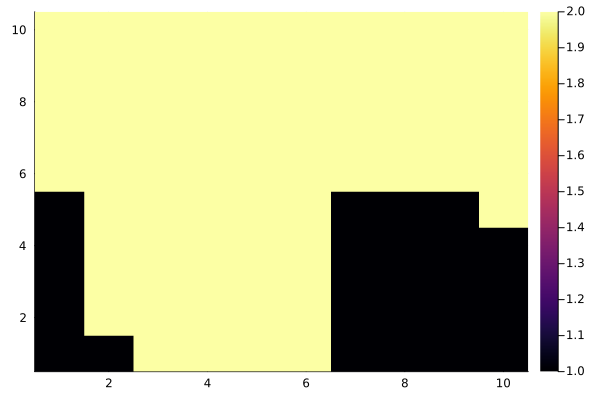

In [231]:
using Plots
#No Usable Ace
heatmap(π[:,:,1])

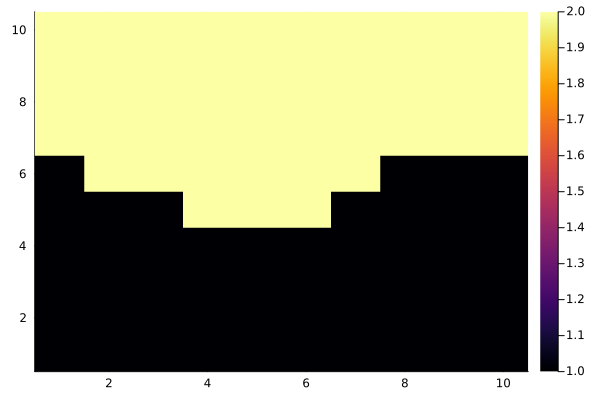

In [229]:
using Plots
#Usable Ace
heatmap(π[:,:,2])

In [230]:
q

10×10×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 -0.543075  -0.276173  -0.258514  …  -0.306106  -0.365801  -0.443314
 -0.569998  -0.325845  -0.295648     -0.356895  -0.410829  -0.481749
 -0.600366  -0.350071  -0.365918     -0.39946   -0.455886  -0.518099
 -0.630849  -0.431333  -0.423757     -0.442507  -0.494143  -0.551892
 -0.6577    -0.495278  -0.485324     -0.483583  -0.524752  -0.592368
 -0.680862  -0.569101  -0.554514  …  -0.528126  -0.57341   -0.631128
 -0.721869  -0.639963  -0.640957     -0.610421  -0.632839  -0.677415
 -0.799174  -0.7457    -0.732926     -0.720678  -0.743937  -0.763221
 -0.873533  -0.864718  -0.87555      -0.857779  -0.858078  -0.862291
 -1.0       -1.0       -1.0          -1.0       -1.0       -1.0

[:, :, 2, 1] =
 -0.422734  -0.149285   -0.12826     …  -0.157141   -0.253833  -0.340053
 -0.435883  -0.147049   -0.128803       -0.143777   -0.238417  -0.32794
 -0.445289  -0.184172   -0.1701         -0.176067   -0.262729  -0.356771
 -0.464065  -0.232211   -0.192543    

As shown from the two heatmaps above for both usable and not usable aces, the graphs show a similar poilcy to Figure 5.2 for hitting and sticking (where black is hit and yellow is stick). There are some differences, however, at those points, the action value function for either action are minimal in difference. Therefore, this policy, shown by the graph, is optimal.